In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data = pd.read_csv("google_play_store_apps_reviews_training.csv")

In [3]:
data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [5]:
data.package_name.value_counts()

com.evernote                  40
com.linkedin.android          40
com.king.candycrushsaga       40
com.imangi.templerun2         40
com.supercell.clashofclans    40
org.mozilla.firefox           40
com.opera.mini.native         40
com.viber.voip                40
com.facebook.orca             40
com.uc.browser.en             40
com.Slack                     40
com.dropbox.android           40
com.facebook.katana           39
com.hamrokeyboard             39
com.whatsapp                  39
com.twitter.android           39
com.google.android.talk       39
com.tencent.mm                39
com.android.chrome            39
com.rovio.angrybirds          39
com.hamropatro                38
com.shirantech.kantipur       36
jabanaki.todo.todoly          24
Name: package_name, dtype: int64

In [6]:
data.groupby("polarity").describe()

package_name                                  review         \
                count unique                  top freq  count unique   
polarity                                                               
0                 583     22  com.facebook.katana   39    583    583   
1                 307     21       com.hamropatro   38    307    307   

                                                                  
                                                        top freq  
polarity                                                          
0          messenger issues ever since the last update, ...    1  
1          love it you are able to see celebrity tweets ...    1

In [7]:
data.describe()

,polarity
count,890.000000
mean,0.344944
std,0.475617
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 1 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  890 non-null    object
 1   review        890 non-null    object
 2   polarity      890 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 27.8+ KB
None


In [9]:
data.polarity.value_counts()

0    583
1    307
Name: polarity, dtype: int64

<AxesSubplot:xlabel='polarity', ylabel='count'>

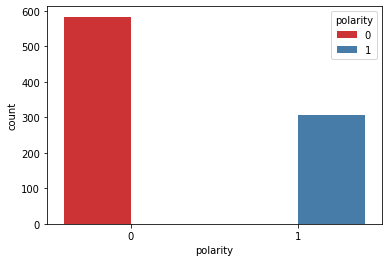

In [10]:
sns.countplot(x="polarity",hue="polarity",data=data,palette="Set1")

In [11]:
data.isnull().sum()

package_name    0
review          0
polarity        0
dtype: int64

# Pre-process Data

In [12]:
def preprocess_data(data):
    # Remove package name as it's not relevant
    data = data.drop("package_name",axis=1)
    
    # Convert text to lowercase
    data["review"] = data["review"].str.strip().str.lower()
    return data

In [13]:
data = preprocess_data(data)

In [14]:
data.sample(5)

,review,polarity
590,ătoo slow loading webclips!!! ăno pdf supp...,0
699,cant download big things i cant download 15+ m...,0
262,the best i agree totally with the last poster....,1
83,issues setting up. works fine now had issues w...,0
364,really? i honestly ussd to love this app.... n...,0


# Splitting Data

In [15]:
x = data["review"]
y = data["polarity"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

In [16]:
print(f"x_train shape is {x_train.shape} , x_test shape is {x_test.shape} ")

x_train shape is (667,) , x_test shape is (223,) 


# convert text column "reviews" into number with help of Vectorize

In [23]:
vec = CountVectorizer(stop_words = "english")
x_train_vec = vec.fit_transform(x_train).toarray()
x_test_vec = vec.transform(x_test).toarray()

In [25]:
x_train_vec.shape

(667, 3134)

# Model Generation

In [26]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_vec,y_train)

MultinomialNB()

In [28]:
model.score(x_test_vec,y_test)

0.8340807174887892

In [34]:
model.score(x_train_vec,y_train)

0.952023988005997

# prediction

In [29]:
y_pred = model.predict(x_test_vec)

<AxesSubplot:>

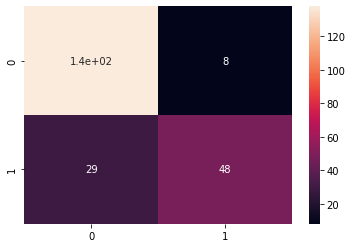

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       146
           1       0.86      0.62      0.72        77

    accuracy                           0.83       223
   macro avg       0.84      0.78      0.80       223
weighted avg       0.84      0.83      0.83       223

